<center><font size="5"><b>HANDWRITTEN EQUATION SOLVER</b></font> </center>

<img src="HandwrittenImage.jpg" width="750" align="center">

## Introduction

Handwriting is an integral feature of human communications. In addition to smartphones and tablets, new devices such as interactive panels, digital pens, and smart writing surfaces have become widely adopted in offices and educational institutions, opening up new opportunities for technologies that recognise specific handwritten content such as mathematics and diagrams. 

The advancements in the field of Computer Vision and Natural Language Processing have fostered robust Human Computer Interaction. Computers are being familiarized with the irregularities of the real world. This facilitates humans to use the computing power to perform otherwise time-consuming tasks and solve complex real-world problems. One such application is in the field of mathematics, that is, to solve handwritten mathematical equations.

Solving mathematical equations is an integral part of science right from basic schooling to major research applications. The computing power of today can give a great boost to solving mathematical equations at all levels. Given the level of complexity a mathematical equation can reach, it is simpler and faster to write it by hand than type it on a computer. A machine learning enabled handwritten equation solver can be a very important tool to simplify calculations. 

## AIM OF THE PROJECT

The aim of this project is to build a deep learning model that can recognise handwritten numbers and mathematical symbols, read it as an equation and evaluate it to give the solution.

  ## Table of Content

1. **[Import Libraries](#lib)**


2. **[Data Processing](#prep)**

      2.1 - **[Image DataGenerator](#datagen)**   
      
      2.2 - **[Creating Train Set](#cts)**
      
      2.2 - **[Creating Validation Set](#cvs)**
      
      
      
3. **[Model Building](#mod)**

      3.1 - **[MODEL 1](#mod1)**   
      
      3.2 - **[MODEL 2](#mod2)**
      
      3.2 - **[MODEL 3](#mod3)**
      

4. **[Saving the Weights](#savewtg)**


5. **[Solving HandWritten Equations](#soleq)**


6. **[Creating Label Maps for the Classes](#label)**   

           
7. **[Model Evaluation](#modeleval)**

      7.1 - **[TEST CASE 1](#test1)**
      
      7.2 - **[TEST CASE 2](#test2)**
      
      7.3 - **[TEST CASE 3](#test3)**
      
                     
8. **[Conclusions](#conclusion)**


<a id="lib"></a>
## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from imutils.contours import sort_contours
import imutils
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(123)

<a id="prep"></a>
# 2. Data Processing

<a id="datagen"></a>
### 2.1 ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,#If None or 0, no rescaling is applied.
    shear_range = 0.2,  #Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range = 0.2,  # Float or [lower, upper]. Range for random zoom. 
    validation_split = 0.30 
)

In [6]:
#path of the data
data_path='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Project\\Handwritten-Equation-Solver\\6classes\\'

<a id="cvt"></a>
### 2.2 Creating Train Set

In [7]:
train_set = train_datagen.flow_from_directory(
    data_path, #path of the data
    target_size = (28, 28), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 10,#size of the batches of data (default: 32).
    class_mode = 'categorical',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='training',#Subset of data ("training" or "validation")
    seed = 123
)

Found 210 images belonging to 6 classes.


#### Interpretation : 

The Train Set consists of 210 Images out of 300 Images

<a id="cvs"></a>
### 2.3 Creating Validation Set

In [8]:
valid_set = train_datagen.flow_from_directory(
    data_path, #path of the data
    target_size = (28, 28), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 10,#size of the batches of data (default: 32).
    class_mode = 'categorical',##- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='validation',#Subset of data ("training" or "validation")
    seed = 123
)

Found 90 images belonging to 6 classes.


#### Interpretation : 

The Validation Set consists of 90 Images out of 300 Images

<a id="mod"></a>
# 3. Model Building

<a id="mod1"></a>
### 3.1 MODEL 1

In [9]:
model1 = Sequential()
model1.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(10, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(5, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(6, activation='softmax'))

In [10]:
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
M1=model1.fit(train_set,validation_data=valid_set, epochs=60,verbose=1)

Epoch 1/60
21/21 [==============================] - 60s 133ms/step - loss: 1.7936 - accuracy: 0.1595 - val_loss: 1.7852 - val_accuracy: 0.2889
Epoch 2/60
21/21 [==============================] - 1s 40ms/step - loss: 1.7830 - accuracy: 0.2067 - val_loss: 1.7708 - val_accuracy: 0.1778
Epoch 3/60
21/21 [==============================] - 1s 40ms/step - loss: 1.7739 - accuracy: 0.2838 - val_loss: 1.7690 - val_accuracy: 0.1667
Epoch 4/60
21/21 [==============================] - 1s 42ms/step - loss: 1.7472 - accuracy: 0.2341 - val_loss: 1.6989 - val_accuracy: 0.3222
Epoch 5/60
21/21 [==============================] - 1s 40ms/step - loss: 1.6771 - accuracy: 0.2829 - val_loss: 1.5732 - val_accuracy: 0.4222
Epoch 6/60
21/21 [==============================] - 1s 50ms/step - loss: 1.5460 - accuracy: 0.4560 - val_loss: 1.3832 - val_accuracy: 0.4889
Epoch 7/60
21/21 [==============================] - 1s 47ms/step - loss: 1.4129 - accuracy: 0.4089 - val_loss: 1.2823 - val_accuracy: 0.4556
Epoch 8/60


In [12]:
def plot_performance(model_history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.plot(model_history.history['accuracy'], 'b', label='train_acc')
    plt.plot(model_history.history['val_accuracy'], 'y', label='val_acc')
    plt.legend()
    plt.title("Train-Validation accuracy vs Epochs")
    plt.subplot(1,2,2)
    plt.grid(True)
    plt.plot(model_history.history['loss'], 'b--', label='train_loss')
    plt.plot(model_history.history['val_loss'], 'y--', label='val_loss')
    plt.title("Train-Validation Loss vs Epochs")
    plt.legend()
    plt.show()

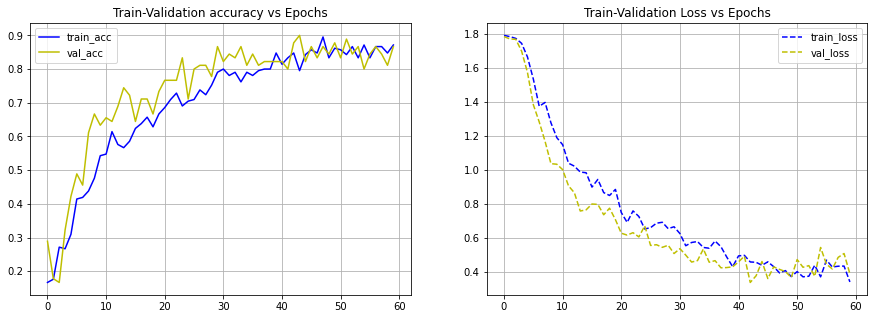

In [13]:
plot_performance(M1)

#### Interpretation :

It is evident from the graph that Train and Validation Accuracy go hand in hand overcoming Overfitting. But the loss clearly states that it is High. Hence we need to improve the Model further.

<a id="mod2"></a>
### 3.2 MODEL 2

In [14]:
model2 = Sequential()
model2.add(Conv2D(30, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(20, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(15, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))
model2.add(Flatten())
#model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(6, activation='softmax'))

In [15]:
# Compile model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
M2=model2.fit(train_set,validation_data=valid_set, epochs=60,shuffle=True,verbose=1)

Epoch 1/60
21/21 [==============================] - 7s 108ms/step - loss: 1.7923 - accuracy: 0.1638 - val_loss: 1.7873 - val_accuracy: 0.1778
Epoch 2/60
21/21 [==============================] - 1s 39ms/step - loss: 1.7878 - accuracy: 0.1861 - val_loss: 1.7786 - val_accuracy: 0.2222
Epoch 3/60
21/21 [==============================] - 1s 40ms/step - loss: 1.7745 - accuracy: 0.3124 - val_loss: 1.7487 - val_accuracy: 0.3222
Epoch 4/60
21/21 [==============================] - 1s 38ms/step - loss: 1.7495 - accuracy: 0.2398 - val_loss: 1.6861 - val_accuracy: 0.3000
Epoch 5/60
21/21 [==============================] - 1s 40ms/step - loss: 1.6711 - accuracy: 0.2905 - val_loss: 1.5331 - val_accuracy: 0.3778
Epoch 6/60
21/21 [==============================] - 1s 40ms/step - loss: 1.5009 - accuracy: 0.3944 - val_loss: 1.3799 - val_accuracy: 0.4889
Epoch 7/60
21/21 [==============================] - 1s 40ms/step - loss: 1.4510 - accuracy: 0.3906 - val_loss: 1.2949 - val_accuracy: 0.5222
Epoch 8/60
2

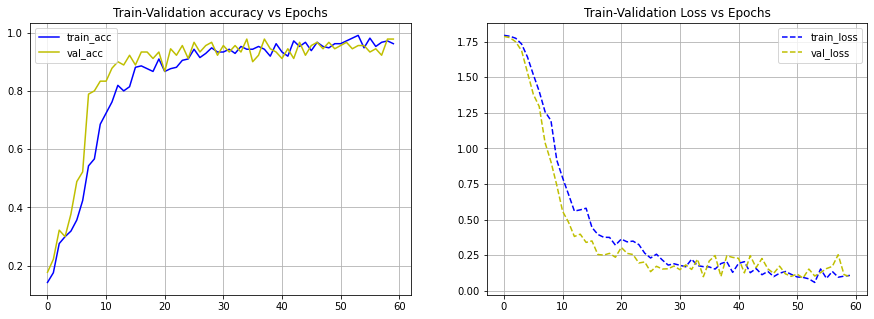

In [17]:
plot_performance(M2)

#### Interpretation :

From the Above graph the train and Validation Accuracy has improved compared to Model 1. 

We can see that there is an Overfitting .

It is important to notice that the Losses have drastically decreased, which indicates a good sign of Model Performance.

<a id="mod3"></a>
### 3.3 MODEL 3

In [18]:
model3 = Sequential()
model3.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(5, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(6, activation='softmax'))

In [19]:
# Compile model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
M3=model3.fit(train_set,validation_data=valid_set, epochs=60,shuffle=True,verbose=1)

Epoch 1/60
21/21 [==============================] - 6s 95ms/step - loss: 1.8502 - accuracy: 0.1416 - val_loss: 1.7788 - val_accuracy: 0.2111
Epoch 2/60
21/21 [==============================] - 1s 43ms/step - loss: 1.7850 - accuracy: 0.1541 - val_loss: 1.7674 - val_accuracy: 0.3333
Epoch 3/60
21/21 [==============================] - 1s 39ms/step - loss: 1.7653 - accuracy: 0.3315 - val_loss: 1.7222 - val_accuracy: 0.4444
Epoch 4/60
21/21 [==============================] - 1s 39ms/step - loss: 1.7074 - accuracy: 0.3600 - val_loss: 1.6094 - val_accuracy: 0.3778
Epoch 5/60
21/21 [==============================] - 1s 38ms/step - loss: 1.6371 - accuracy: 0.3817 - val_loss: 1.4190 - val_accuracy: 0.5111
Epoch 6/60
21/21 [==============================] - 1s 38ms/step - loss: 1.4410 - accuracy: 0.5179 - val_loss: 1.1088 - val_accuracy: 0.8000
Epoch 7/60
21/21 [==============================] - 1s 39ms/step - loss: 1.1258 - accuracy: 0.7633 - val_loss: 0.7228 - val_accuracy: 0.8889
Epoch 8/60
21

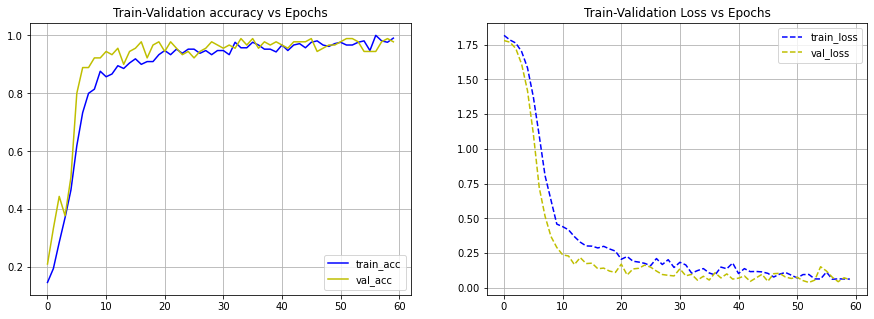

In [21]:
plot_performance(M3)

#### Interpretation :

This is our best Model handles overfitting and fetches a reasonably low loss, when comparing train and Validation.

<a id="savewtg"></a>
# 4. Saving the Weights

In [22]:
model_json = model3.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model3.save_weights("model3_final.h5")

<a id="soleq"></a>
# 5. Solving HandWritten Equations

In [84]:
def prediction(img):
    #plt.imshow(img, cmap = 'gray')
    img = cv2.resize(img,(28, 28))
    #norm_image = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    norm_image=img/255.0
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = model3.predict_classes([case])
    
    return ([i for i in train_set.class_indices if train_set.class_indices[i]==(pred[0])][0],pred)

<a id="label"></a>
# 6. Creating Label Maps for the Classes

In [86]:
train_set.class_indices

{'+': 0, '1': 1, '2': 2, '3': 3, '4': 4, 'x': 5}

In [87]:
label_map = (train_set.class_indices)
label_map

{'+': 0, '1': 1, '2': 2, '3': 3, '4': 4, 'x': 5}

In [88]:
def image_path(path):
    image=cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
    edged = cv2.Canny(blurred, 30, 150)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    chars=[]
    for c in cnts:
    # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
        if w*h>1200:
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
            roi = gray[y:y + h, x:x + w]
            chars.append(prediction(roi))
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return chars,image

<a id="modeleval"></a>
# 7 Model Evaluation

<a id="test1"></a>
### 7.1 TEST CASE 1

In [90]:
path='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Project\\Handwritten-Equation-Solver\\test1.jpeg'
chars,image=image_path(path)

In [91]:
chars

[('2', array([2], dtype=int64)),
 ('3', array([3], dtype=int64)),
 ('+', array([0], dtype=int64)),
 ('2', array([2], dtype=int64))]

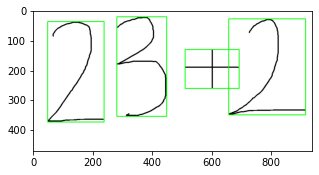

In [92]:
plt.figure(figsize=(5,5))
plt.imshow(image)

In [93]:
def NumericalSolver(characters):
        c=[]
        
        for i in characters:
            if i[0][:]=='x':
                pos = i[0][:].replace("x","*")
                c.append(pos)
            else:
                c.append(i[0][:])

        EQUATION=' '
        for i in c:
            EQUATION=EQUATION + (i[0][0])
        print('The Handwritten equation is :',EQUATION)
        print('The result is : ',eval(EQUATION))

In [94]:
NumericalSolver(chars)

The Handwritten equation is :  23+2
The result is :  25


<a id="test2"></a>
### 7.2 TEST CASE 2

In [96]:
path='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Project\\Handwritten-Equation-Solver\\test2.jpeg'
chars,image=image_path(path)

In [97]:
chars

[('1', array([1], dtype=int64)),
 ('2', array([2], dtype=int64)),
 ('x', array([5], dtype=int64)),
 ('3', array([3], dtype=int64))]

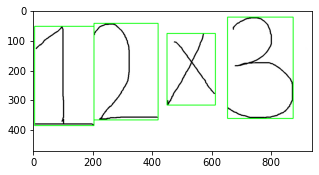

In [98]:
plt.figure(figsize=(5,5))
plt.imshow(image)

In [99]:
NumericalSolver(chars)

The Handwritten equation is :  12*3
The result is :  36


<a id="test3"></a>
### 7.3 TEST CASE 3

In [100]:
path='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Project\\Handwritten-Equation-Solver\\test3.jpeg'
chars,image=image_path(path)

In [101]:
chars

[('4', array([4], dtype=int64)),
 ('3', array([3], dtype=int64)),
 ('+', array([0], dtype=int64)),
 ('2', array([2], dtype=int64)),
 ('1', array([1], dtype=int64))]

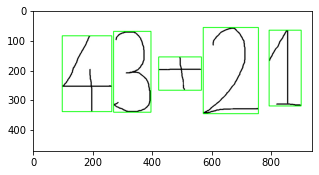

In [102]:
plt.figure(figsize=(5,5))
plt.imshow(image)

In [103]:
NumericalSolver(chars)

The Handwritten equation is :  43+21
The result is :  64


<a id="conclusion"></a>
# 8. CONCLUSION

The final model was able to correctly identify and evaluate most of the samples, but on some occasions it failed to identify one or more characters due to the lack of training samples.